# Vehicle Ads Analysis

You are an analyst at Crankshaft List. Hundreds of free vehicle ads are served on your website every day. You need to study datasets over the last few years and determine the factors that influence the price of a vehicle.

<b>Questions:</b>
    
   1. What factors most influence the price of a vehicle?

<b>Stages:</b>

1. [Data Overview](#Start)
2. [Data Pre-processing](#Pre-processing)
    - [Missing values](#missing)
    - [Fixed data type](#type)
    - [Improved data quality](#quality)
    - [Checking data that is clean](#check)
3. [*Exploratory Data Analysis*](#EDA)
    - [Analyze core parameters](#parameters)
    - [Analyze and deal with *outliers*](#outlier)
    - [Analyze core parameters without *outliers*](#result)
    - [Ads validity period](#advertisement)
    - [Average price of each type of vehicle](#price)
    - [Factors affecting the price](#price2)
4. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Load all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data file into DataFrame
df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\3 Project\\vehicles_us.csv')

In [3]:
# General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Dataset size
df.shape

(51525, 13)

In [5]:
# Sample data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Here are some things that can be taken from the condition of the dataset:
- Correct column names
- There are data types that do not match the column `model_year`, `cylinders`, `odometer`, `is_4wd`, `date_posted`
- There are missing values ​​in the column `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`

Documentation:

- `price` - the price of the vehicle
- `model_year` - the model year of the vehicle
- `model` - vehicle model
- `condition` - the condition of the vehicle
- `cylinders` - the number of cylinders of the vehicle
- `fuel` - gas, diesel, etc.
- `odometer` - the vehicle mileage when the ad is shown
- `transmission` - the type of vehicle transmission
- `paint_color` - the color of the vehicle
- `is_4wd` - does the vehicle have 4 wheel drive (Boolean type)
- `date_posted` - the date the ad was posted
- `days_listed` - the number of days the ad was served until it was removed

In [6]:
# General description of the dataset
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# Duplicate check
df.duplicated().sum()

0

As seen there is no duplication in the dataset.

In [8]:
# Filter missing values
df_null = df.loc[
    (df['model_year'].isna()) & 
    (df['cylinders'].isna()) & 
    (df['odometer'].isna()) & 
    (df['paint_color'].isna()) & 
    (df['is_4wd'].isna())
]

In [9]:
# Missing values in filtered columns
df_null.isna().sum()

price           0
model_year      4
model           0
condition       0
cylinders       4
fuel            0
odometer        4
transmission    0
type            0
paint_color     4
is_4wd          4
date_posted     0
days_listed     0
dtype: int64

In [10]:
# View all missing values in the dataset
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
# Percentage of missing values compare to the dataset
df.isna().sum()/len(df)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [12]:
# Distribution with characteristic of `type` column
df_null['type'].value_counts()

sedan    2
van      1
SUV      1
Name: type, dtype: int64

In [13]:
# Distribution of the `type` column in the dataset
df['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [14]:
# Distribution with characteristic of `condition` column
df_null['condition'].value_counts()

excellent    3
like new     1
Name: condition, dtype: int64

In [15]:
# Distribution of the `condition` column in the dataset
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [16]:
# Distribution with characteristic of `tranmission` column
df_null['transmission'].value_counts()

automatic    4
Name: transmission, dtype: int64

In [17]:
# Distribution of the `tranmission` column in the dataset
df['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

**Tentative conclusion**

1. There are several columns that have missing values. After comparing several characteristics of the missing values, no pattern was found, and the relationship between the missing values and the others, this shows that the missing values include the type *MCAR-Missing Completely at Random*.
2. There are several columns that can be changed according to the data type

To overcome MCAR, the following steps are taken:
1. If filled:
    - Fill with default value,
    - Fill in the median if there are outliers, use the mean if there are no outliers, or use the mode for categorical types
2. If deleted:
    - Removed missing values
    - Delete rows with missing values
    - Delete columns with missing values

## Data Pre-processing <a id="Pre-processing"></a>

### Missing values <a id="missing"></a>

In [18]:
# Checkpoint variabel
df_edit = df

In [19]:
# Function to fill in missing values
'''
Definition:
-----------
    This function is to fill in missing values based on conditions from other columns
-----------
    data:
        desired data
    agg_columns:
        column with the desired condition
    value_columns:
        column with missing value
    buttons:
        1 means the missing values are filled with the median
        2 means the missing values are filled in with the mean
        3 means the missing values are filled with mode/mode
'''
def fill_missing_value(data, agg_column, value_column, button=1):
    
    # Buttons to change the mean, median or mode
    if button == 1:
        grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    elif button == 2:
        grouped_values = data.groupby(agg_column)[value_column].mean().reset_index()
    else:
        grouped_values = data.groupby(agg_column)[value_column].apply(pd.Series.mode).reset_index()
    
    # Number of rows in the grouped column
    size = len(grouped_values)
    
    # Insert missing values into the dataset
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[ (data[agg_column]==group) & (data[value_column].isna()), value_column ] = value
    return data

**`model_year` column**

This column is a categorical column type, the percentage is 7.023775 which is quite a lot, so missing values can be filled with the mode value of the column.

In [20]:
# View missing values in `model_year` column
df_edit.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [21]:
# Replace missing values with mode
fill_missing_value(data = df_edit, agg_column = 'model', value_column = 'model_year', button=3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [22]:
# Checking the result
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The `model_year` column has been successfully fixed by replacing the missing value with the *mode* value from the column.

**`cylinders` column**

This column is a categorical column type, the percentage is 10.208637 which is quite high, so missing values can be filled with *modus* values.

In [23]:
# View missing values in `cylinders` column
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [24]:
# Replace missing values with mode
fill_missing_value(data = df_edit, agg_column = 'model', value_column = 'cylinders', button=3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [25]:
# Checking the result
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The `cylinders` column has been successfully fixed by replacing the missing value with *mode* in the column.

**`odometer` column**

This column is also a numeric column type, with a percentage of 15.316836 which is quite high, so missing values can be filled with *median* if there are *outliers*, or use *mean* if not there are *outliers*.

In [26]:
# View missing values in the `odometer` column
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [27]:
# View the standard deviation from the `odometer` column
df_edit['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

It seems that the standard deviation is quite large, so may be there is *outliers*, so missing values can be filled in using *median*.

In [28]:
# Replace missing values with median
fill_missing_value(data = df_edit, agg_column = 'condition', value_column = 'odometer', button=1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [29]:
# Checking the result
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

The `odometer` column has been successfully fixed by replacing the missing values ​​with *median*.

**`pain_color` Column**

This column is also a categorical column type, with a high percentage of 17.985444, so missing values can be filled with constant values.

In [30]:
# View missing values in the `paint_color` column
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [31]:
# A unique value in the `paint_color` column
df_edit['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [32]:
# Fill in missing values with 'unknown'
df_edit['paint_color'] = df_edit['paint_color'].fillna('unknown')

In [33]:
# Checking the result
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

`pain_color` column has been successfully fixed by replacing the missing value with 'unknown'

**`is_4wd` column**

This column is also a categorical column type, with a percentage of 50.369723 high enough, so missing values can be filled with constant values.

In [34]:
# View missing values in `is_4wd` column
df_edit.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [35]:
# Unique value in `is_4wd` column
df_edit['is_4wd'].unique()

array([ 1., nan])

In [36]:
# Fill in missing values with '0'
df_edit['is_4wd'] = df_edit['is_4wd'].fillna(0)

In [37]:
# Checking the result
df_edit.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

The `is_4wd` column was successfully fixed by replacing the missing value with '0'.

### Fixed data type <a id="type"></a>

The `model_year`, `cylinders`, `odometer`, `is_4wd` and `date_posted` fields have incorrect data types.

**`model_year` column**

This column type needs to be changed because normally there are no years that show decimals.

In [38]:
# Change data type from `model_year` column
df_edit['model_year'] = df_edit['model_year'].astype('int')

# Displays the result
df_edit.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [39]:
# Check results
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


The data type of the `model_year` column has been successfully fixed by changing the data type to `int64`.

**`cylinders` column**

This column type needs to be replaced, for the same reason that the `model_year` column normally displays a decimal number for the cylinder type in a car.

In [40]:
# Changes the data type of the `cylinders` column
df_edit['cylinders'] = df_edit['cylinders'].astype('int')

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [41]:
# Check results
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 4.7+ MB


The data type of `cylinders` column has been successfully fixed by changing the data type to `int64`.

**`odometer` column**

Just like the `model_year` or `cylinders` column, normally the odometer in a car shows decimal numbers.

In [42]:
# Change the data type of the `odometer` column
df_edit['odometer'] = df_edit['odometer'].astype('int')

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28


In [43]:
# Check results
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int32  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  int32  
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 4.5+ MB


The data type of the `odometer` column has been successfully fixed by changing the data type to `int64`.

**`is_4wd` column**

This column also normally shows decimal numbers.

In [44]:
# Change the data type of `is_4wd` column
df_edit['is_4wd'] = df_edit['is_4wd'].astype('bool')

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [45]:
# Check results
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int32(3), int64(2), object(7)
memory usage: 4.2+ MB


The data type of `is_4wd` column has been successfully fixed by changing the data type to `bool`.

**`date_posted` column**

To make it easier to process data in this column, it will be easier if the type of this column is changed.

In [46]:
# Change the data type of `date_posted` column
df_edit['date_posted'] = pd.to_datetime(df_edit['date_posted'], format='%Y-%m-%d')

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [47]:
# Check results
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 4.2+ MB


The data type of the `date_posted` column has been successfully fixed by changing the data type to `datetime64[ns]`.

### Improved data quality <a id="quality"></a>

In [48]:
# Examine the initial row of the dataset
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [49]:
# Added the day, month and year column when the ad was served
df_edit['day_posted'] = df_edit['date_posted'].dt.day_name()
df_edit['month_posted'] = df_edit['date_posted'].dt.month_name()
df_edit['year_posted'] = df_edit['date_posted'].dt.year

# Added the age of the vehicle when the ad is shown
df_edit['car_age'] = df_edit['year_posted'] - df_edit['model_year']

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,5
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2


In [50]:
# Changed the value of the `car_age` column with a value of 0 to 1 to make calculations easier
df_edit.loc[df_edit['car_age'] == 0, 'car_age'] = 1

In [51]:
# Added the average vehicle mileage per year
df_edit['odometer_per_year'] = round(df_edit['odometer'] / df_edit['car_age'])

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,odometer_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.0
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,5,17741.0
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.0
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11351.0
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0


In [52]:
# Change the value of the `condition` column
# The value to change
value = {
    "new" : 5,
    "like new" : 4,
    'excellent' : 3,
    "good" : 2,
    "fair" : 1,
    "salvage" : 0
}

# Apply it to the `condition` column
df_edit["condition_id"] = df_edit["condition"].map(value)

# Displays the result
df_edit.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,odometer_per_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.0,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11351.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0,3


In [53]:
# Checks the value in the `condition_id` column
df_edit['condition_id'].unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

### Checking data that is clean <a id="check"></a>

In [54]:
# Checkpoint variable
df_clean = df_edit

In [55]:
# Display general information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  int32         
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  day_posted         51525 non-null  object        
 14  month_

In [56]:
# Sample data
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,odometer_per_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.0,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,5,17741.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.0,4
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,Friday,March,2019,16,11351.0,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0,3


**Tentative conclusion**
1. There is a column that has been corrected by replacing the missing value with the mode value, the median of the column. Also there are replaced with strings, and also integers.
2. Several column types such as int64, bool, and datetime64 are used to fix the column type.
3. Added several columns such as day, month and year when the ad was shown, also added a column with the average vehicle mileage per year.
4. Change the values in the `car_age` and `condition` columns to simplify the analysis process.

## *Exploratory Data Analysis* <a id="EDA"></a>

### Analyze core parameters <a id="parameters"></a>

Analyze the following parameters:
- Price,
- Age of the vehicle when the ad was shown,
- Mileage,
- Number of cylinders,
- Condition,

and check the effect of *outliers* for easy histogram reading.

In [57]:
# Initial dataset size
df_clean.shape

(51525, 19)

In [58]:
# Function to display the histogram, or boxplot for each parameter
'''
Definition:
-----------
    This function is to display the histogram for each parameter
-----------
    data:
        desired data
    which_columns:
        column of the desired parameter
    buttons:
        1 means create a histogram
        2(or other than 1) means make a boxplot 
'''
def hist_box (data, which_column, buttons=1):
    
    # Specifies the buttons
    if buttons==1:
        
        # Insert column
        col_name = [which_column]
        
        # Make the graph
        for col in col_name:
            data.hist(col,  figsize = (10,10))
            plt.title(col)
            
    else:
        
        # To be on 1 row
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        
        # Make the graph
        for i in range(len(which_column)):
            axs[i].boxplot(df_clean[which_column[i]])
            axs[i].set_title(which_column[i])
    
    return plt.show()

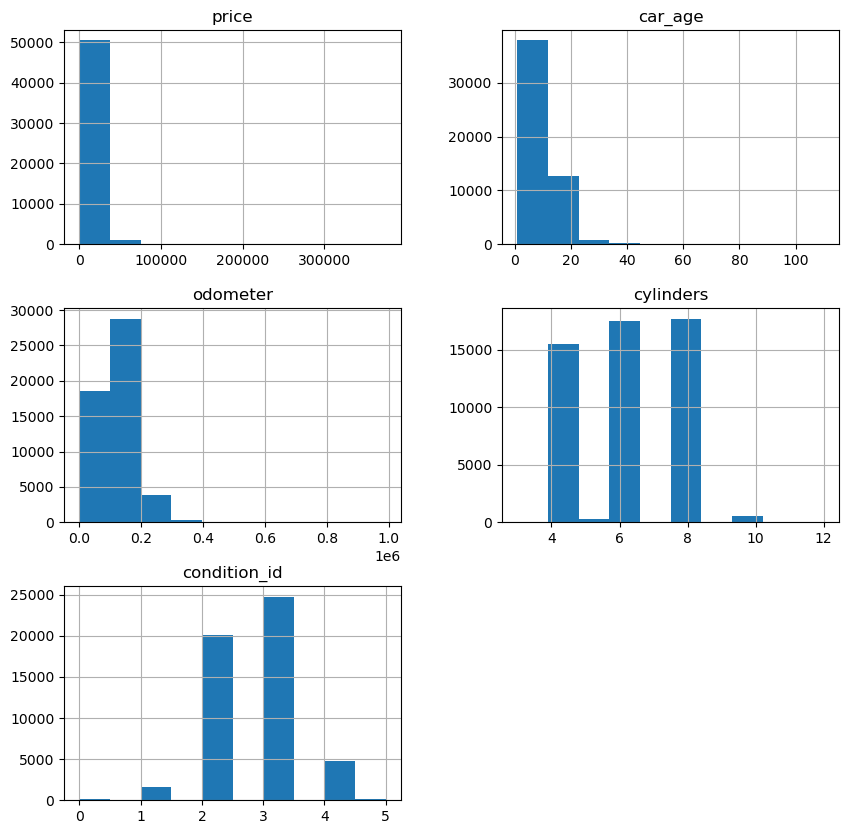

In [59]:
# Histogram on the core parameter column
hist_box (data = df_clean, which_column = ['price', 'car_age', 'odometer', 'cylinders', 'condition_id'], buttons=1)

From the several parameters above, as can be seen in the `price`, `odometer` columns, there are *outliers* according to the initial hypothesis.

### Analyze and deal with *outliers* <a id="outlier"></a>

Let's use the `price`, `car_age` and `odometer` columns to anlyze possible *outliers*.

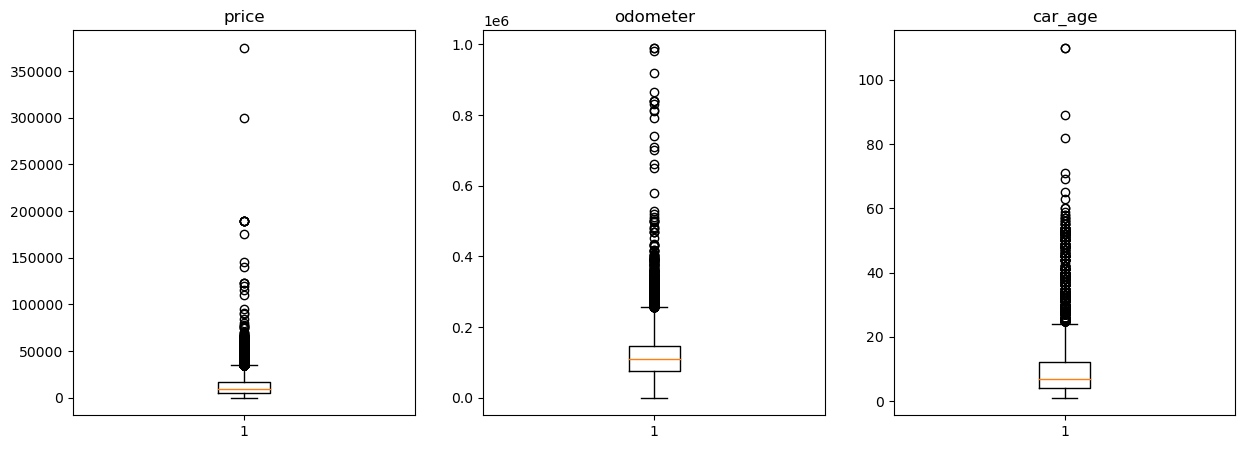

In [60]:
# Checking for outliers in the `price` and `odometer` columns with visualization
hist_box (data = df_clean, which_column = ['price', 'odometer', 'car_age'], buttons=2)

In [61]:
# Check for outliers in the `price` and `odometer` columns by numeric
df_clean[['price', 'odometer', 'car_age']].describe()

,price,odometer,car_age
count,51525.000000,51525.000000,51525.000000
mean,12132.464920,115199.007278,8.478700
std,10040.803015,60484.868232,6.103645
min,1.000000,0.000000,1.000000
25%,5000.000000,75668.000000,4.000000
50%,9000.000000,110908.000000,7.000000
75%,16839.000000,147821.000000,12.000000
max,375000.000000,990000.000000,110.000000


As can be seen from the description and boxplot of the `price`, `car_age` and `odometer` columns, it can be seen that there are *outliers* of the three columns.

In [62]:
# Function to remove outliers by column
'''
Definition:
-----------
    This function is to remove outliers based on the desired column
-----------
    data:
        desired data
    column_name:
        column of the desired parameter
'''
def remove_outlier (data, column_name):
    
    # Dataset
    df_filter = data
    
    # Counting and filtering
    for col in column_name:
        
        # Q1 and Q3 datasets
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        # IQR (interquartile range)
        IQR = Q3 - Q1
        
        # Minimum and maximum
        minimum = Q1 - 1.5*IQR
        maximum = Q3 + 1.5*IQR
        
        # Filter dataset
        df_filter = df_filter.loc[(df_filter[col] >= minimum) & (df_filter[col] <= maximum)]
    return df_filter

In [63]:
# New dataset without outliers
df_new = remove_outlier (data = df_clean, column_name = ['price', 'odometer', 'car_age'])

In [64]:
# Re-check outliers in the `price` and `odometer` columns by numeric
df_new[['price', 'odometer', 'car_age']].describe()

,price,odometer,car_age
count,48288.000000,48288.000000,48288.000000
mean,11237.198000,113704.104891,8.173936
std,7828.319978,53137.272059,5.049013
min,1.000000,0.000000,1.000000
25%,5000.000000,78669.500000,4.000000
50%,8995.000000,111939.000000,7.000000
75%,15990.000000,146000.000000,12.000000
max,34595.000000,256000.000000,24.000000


In [65]:
# Checking dataset size
df_new.shape

(48288, 19)

Using the `price`, `car_age` and `odometer` columns, *outliers* were successfully filtered and created a new dataset without any *outliers*.

### Analyze core parameters without *outliers* <a id="result"></a>

With a new dataset without any *outliers*, let's repeat to analyze some of the parameters above.

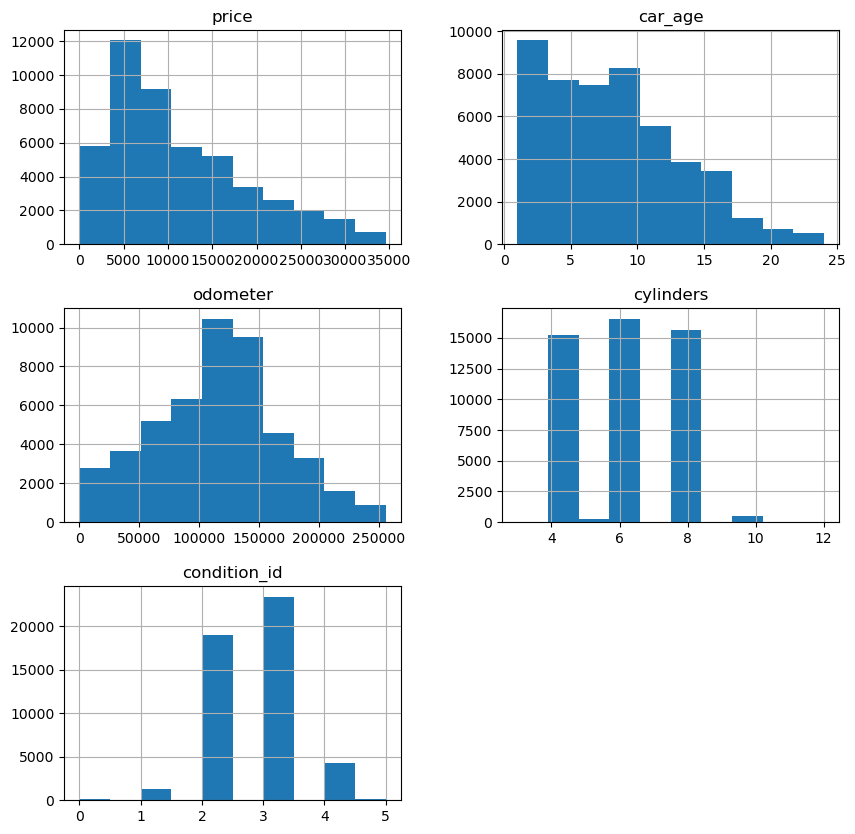

In [66]:
# Histogram on core parameter column without outliers
hist_box (data = df_new, which_column = ['price', 'car_age', 'odometer', 'cylinders', 'condition_id'], buttons=1)

In [67]:
# column description
df_new[['price', 'car_age', 'odometer', 'cylinders', 'condition_id']].describe()

,price,car_age,odometer,cylinders,condition_id
count,48288.000000,48288.000000,48288.000000,48288.000000,48288.000000
mean,11237.198000,8.173936,113704.104891,6.053802,2.636411
std,7828.319978,5.049013,53137.272059,1.657069,0.698265
min,1.000000,1.000000,0.000000,3.000000,0.000000
25%,5000.000000,4.000000,78669.500000,4.000000,2.000000
50%,8995.000000,7.000000,111939.000000,6.000000,3.000000
75%,15990.000000,12.000000,146000.000000,8.000000,3.000000
max,34595.000000,24.000000,256000.000000,12.000000,5.000000


As can be seen, based on the filtered `price`, `car_age` and `odometer` columns it already shows a dataset without any *outliers*. So with this dataset further analysis can be carried out.

### Ads validity period <a id="advertisement"></a>

Let's explore the `days_listed` column to find out the number of days an ads served.

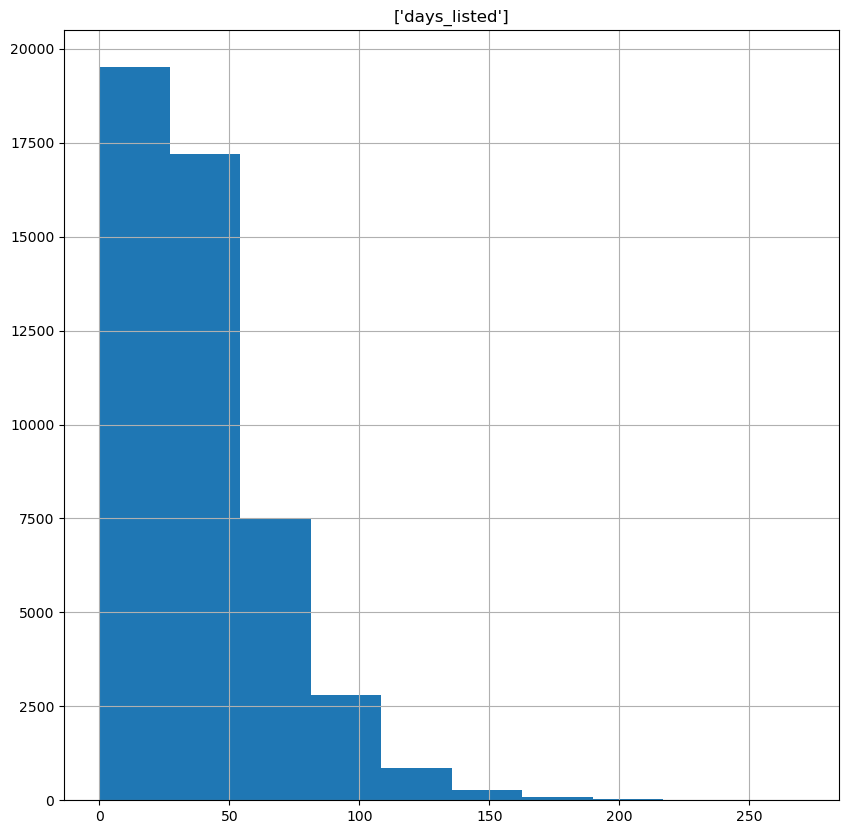

In [68]:
# Histogram in the `days_listed` column
hist_box (data = df_new, which_column = ['days_listed'], buttons=1)

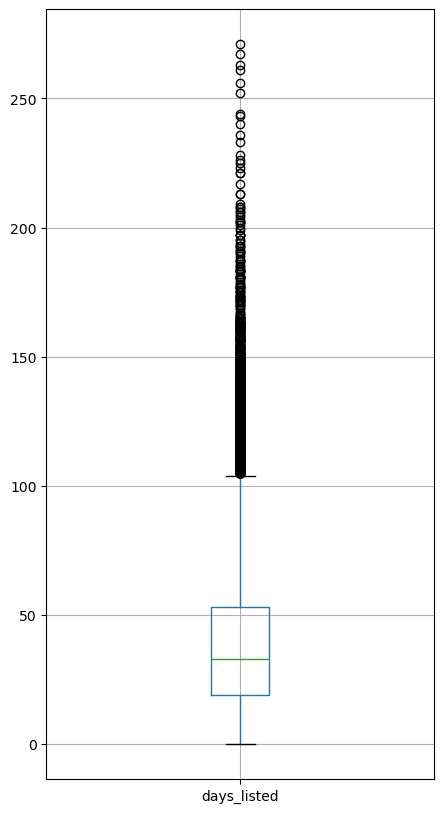

In [69]:
# The boxplot of the `days_listed` column
df_new.boxplot(column = 'days_listed', figsize=(5,10))

# Displays the result
plt.show()

In [70]:
# Find out the common values of the `days_listed` column
df_new['days_listed'].describe()

count    48288.000000
mean        39.540735
std         28.213427
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Seen in the graph above, generally around 40 days an ads is shown, from 0 to 19 days the ads is considered to be deleted too quickly, and for 53 to 100 days the ads is considered to be served for a very long time.

### Average price of each type of vehicle <a id="price"></a>

Let's explore the `type` and `price` columns to learn the price of each type of vehicle, and see how these two parameters depend.

In [71]:
# Create a pivot table from `type` and `price` columns
stat_price = pd.pivot_table(df_new, index = 'type', values = 'price', aggfunc = ['median', 'count'])

# Rename the column
stat_price.columns = ['price', 'ads']

# Sort table by number of ads
stat_price.sort_values(by='ads', ascending=False)

,price,ads
type,,
sedan,5995.0,12008
SUV,8800.0,11885
truck,14900.0,11071
pickup,13999.0,6273
coupe,12900.0,2029
wagon,7925.0,1500
mini-van,6500.0,1141
hatchback,5992.5,1006
van,7800.0,578


The table above shows that there are several types of vehicles that have a large number of advertisements, such as SUVs, sedans and trucks.

### Factors affecting the price <a id="price2"></a>

Let's analyze the factors that affect the price of a vehicle with the type of SUV that has the most number of ads.

In [72]:
# Filter dataset by vehicle type
suv_df = df_new.query('type in ("SUV")')
suv_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,odometer_per_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,June,2018,7,20714.0,2
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,January,2019,6,18246.0,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,Monday,July,2018,6,17362.0,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,Friday,February,2019,11,13381.0,3
14,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,Thursday,January,2019,10,13228.0,3


In [73]:
# Create a new table based on the core parameters
suv = suv_df[['price', 'car_age', 'odometer', 'condition_id', 'transmission', 'paint_color']].reset_index(drop=True)
suv.head()

,price,car_age,odometer,condition_id,transmission,paint_color
0,9400,7,145000,2,automatic,unknown
1,15990,6,109473,3,automatic,black
2,11500,6,104174,3,automatic,unknown
3,9200,11,147191,3,automatic,blue
4,12990,10,132285,3,automatic,black


In [74]:
# Function to display graphs for each parameter
'''
Definisi:
Definition:
-----------
    This function is to display a histogram for each parameter according to the column type
-----------
    data:
        desired data
    column_name:
        column of the desired parameter
'''
def grafik (data, column_name ):
    
    # If the column has a numeric data type
    if (column_name == 'transmission') | (column_name == 'paint_color'):
        data.boxplot(column ='price', by=column_name, figsize=(10,10))
    
    # If the column has a categorical data type
    else:
        data.plot(x=column_name, y='price', kind='scatter', alpha=0.05, figsize=(10,10))
        
    return plt.show()

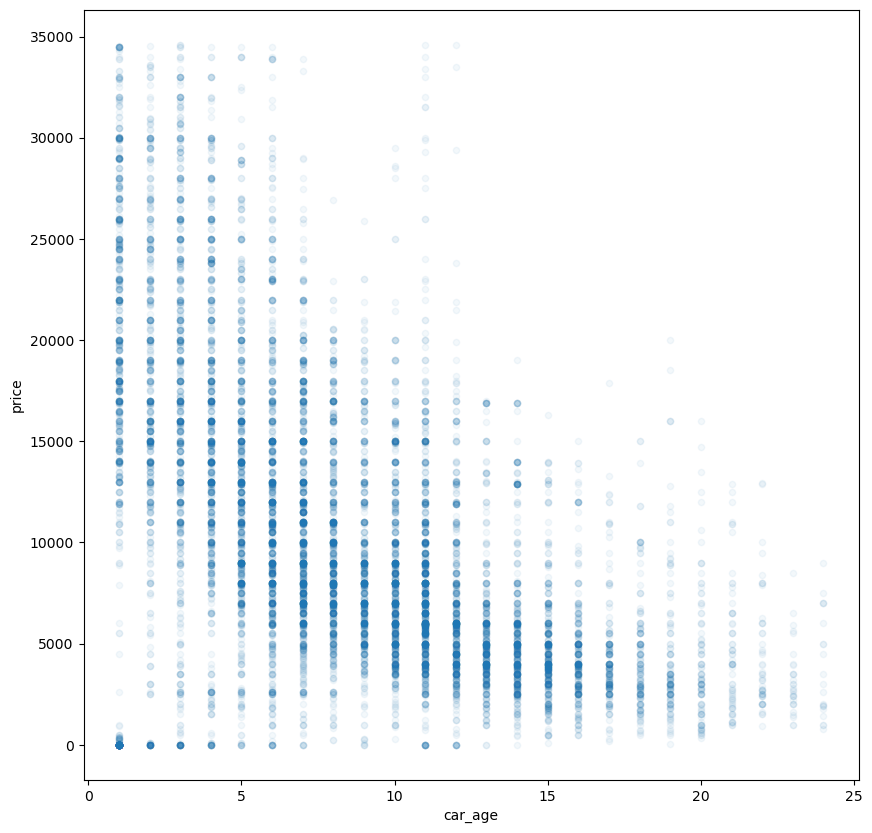

In [75]:
# price vs car_age graph
grafik (data=suv, column_name='car_age')

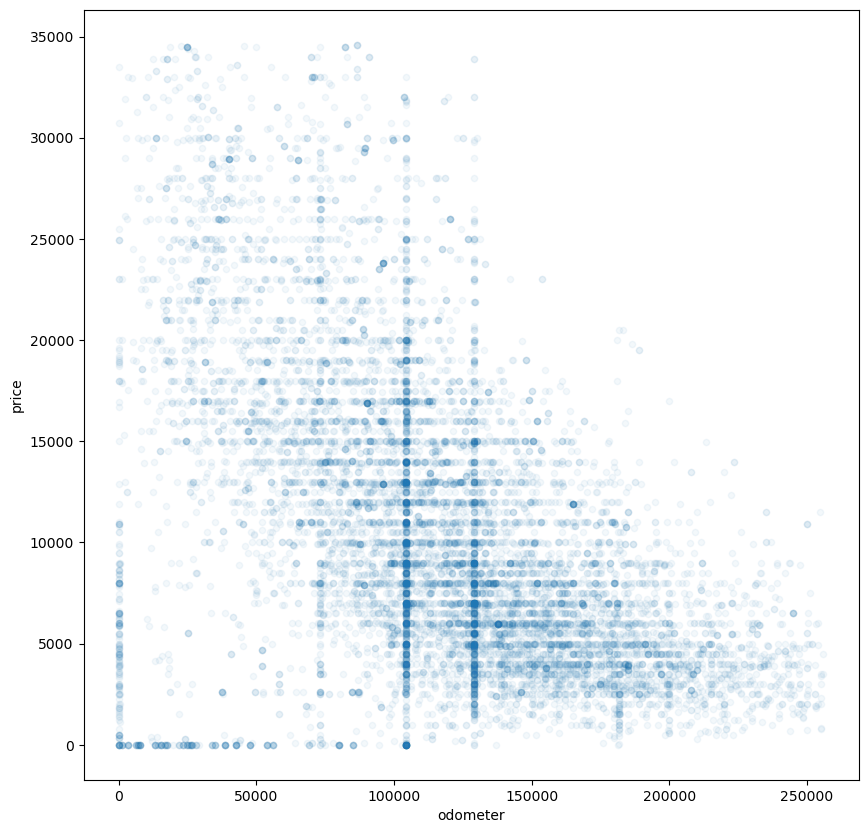

In [76]:
# Price vs odometer graph
grafik (data=suv, column_name='odometer')

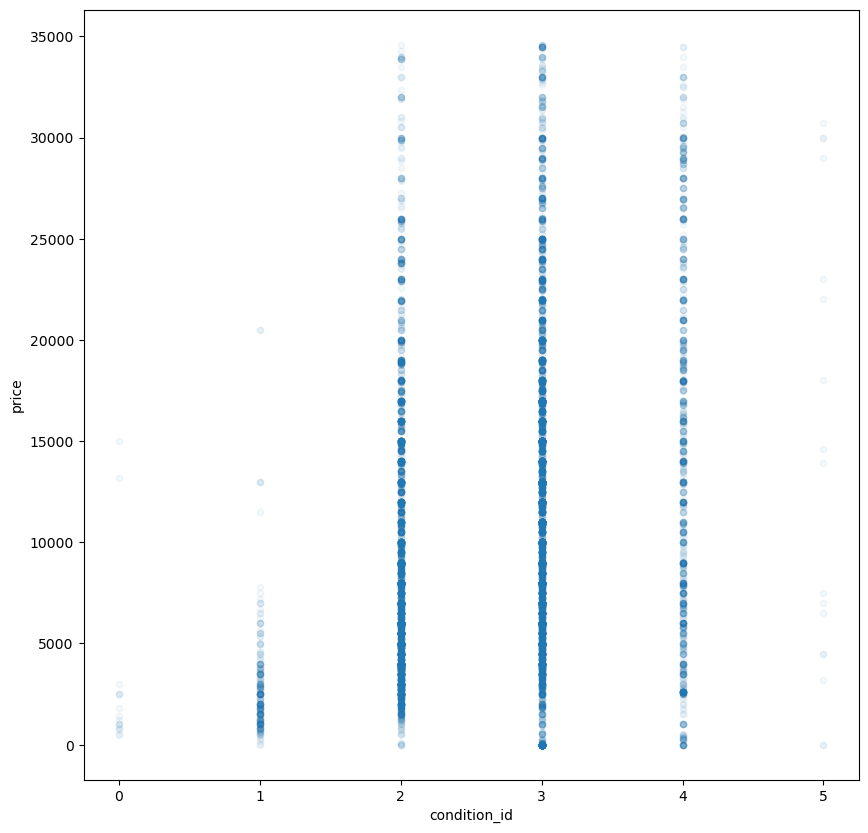

In [77]:
# price vs condition_id graph
grafik (data=suv, column_name='condition_id')

In [78]:
# Checks the total value of the `transmission` column
suv['transmission'].value_counts()

automatic    11267
manual         460
other          158
Name: transmission, dtype: int64

Because all types of transmission have more than 50 data, so it can be directly analyzed.

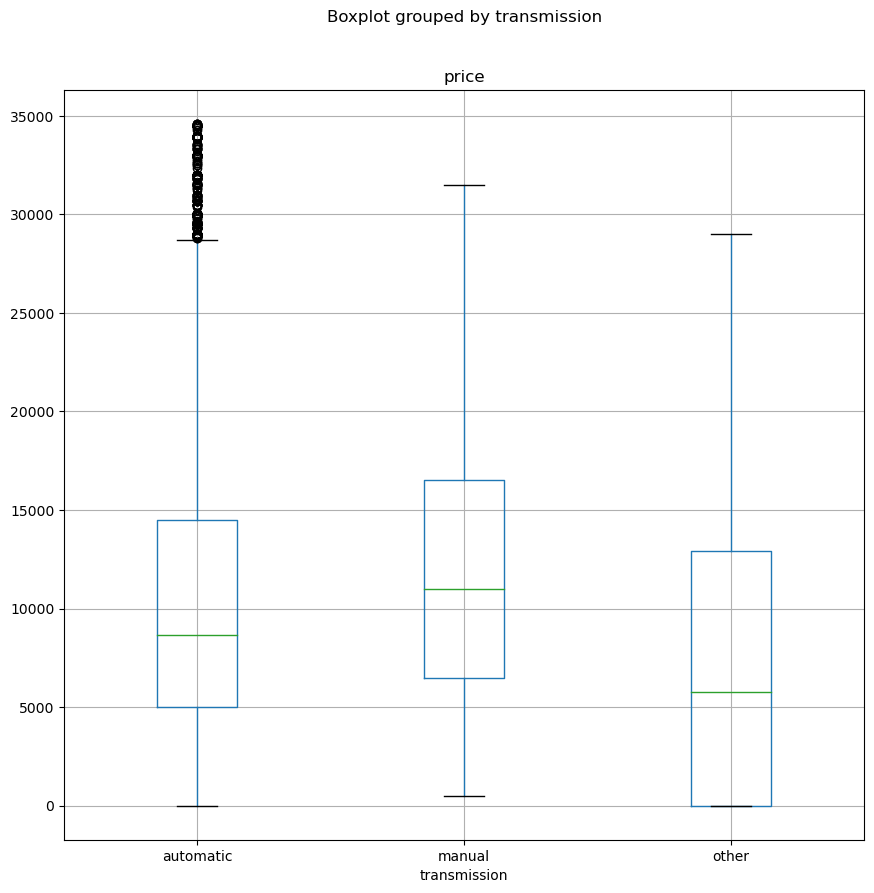

In [79]:
# price vs transmission graph
grafik (data=suv, column_name='transmission')

In [80]:
# Checks the total value of the `paint_color` column
suv['paint_color'].value_counts()

unknown    2141
black      2090
white      1869
silver     1530
grey       1146
blue       1011
red         872
green       413
brown       351
custom      298
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64

Because the `yellow` and `purple` values ​​have less than 50 data, we need to filter these columns first.

In [81]:
# Filter suv table
suv_filt = suv.query('paint_color != ("yellow", "purple")')
suv_filt['paint_color'].value_counts()

unknown    2141
black      2090
white      1869
silver     1530
grey       1146
blue       1011
red         872
green       413
brown       351
custom      298
orange       81
Name: paint_color, dtype: int64

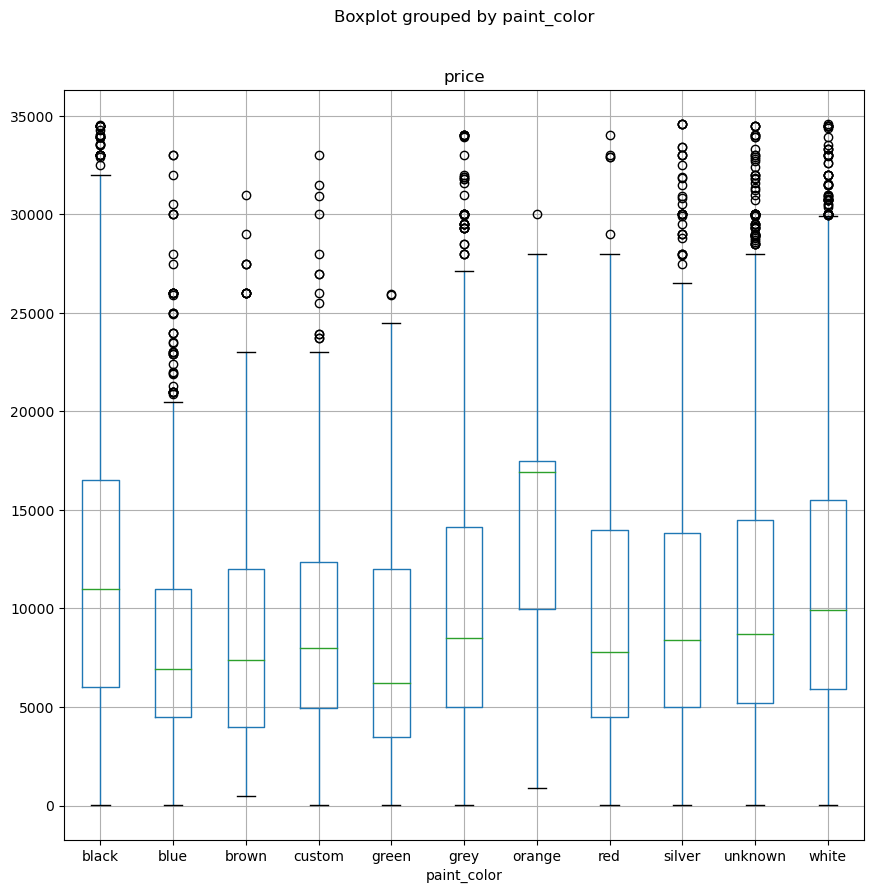

In [82]:
# price vs paint_color graph
grafik (data=suv_filt, column_name='paint_color')

In [83]:
# Find out the Pearson coefficient on the dataset
suv.corr()

,price,car_age,odometer,condition_id
price,1.000000,-0.570434,-0.485357,0.260953
car_age,-0.570434,1.000000,0.539700,-0.300601
odometer,-0.485357,0.539700,1.000000,-0.350307
condition_id,0.260953,-0.300601,-0.350307,1.000000


Pearson's coefficient shows:

The closer the coefficient is to -1 or 1, the stronger the dependence. A value close to 0 indicates a weak connection, while a value of 0 indicates that there is no connection or that there is a complex non-linear connection that cannot be represented by the coefficients

Based on several graphs and tables above and the Pearson coefficient, the most influential factors on the type of SUV vehicle are the age and mileage of the vehicle, the black color with the manual transmission type being the SUV type which has the most expensive price.

Factors that influence the price of sedan type vehicles also need to be analyze where sedans also have the highest number of advertisements.

In [84]:
# Filter dataset by vehicle type
sedan_df = df_new.query('type in ("sedan")')

# Displays the result
sedan_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,odometer_per_year,condition_id
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,6,18333.0,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,2,40452.0,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,4,14488.0,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,3,26404.0,3
11,8990,2012,honda accord,excellent,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,Thursday,March,2019,7,15877.0,3


In [85]:
# Create a new table based on the core parameters
sedan = sedan_df[['price', 'car_age', 'odometer', 'condition_id', 'transmission', 'paint_color']].reset_index(drop=True)

# Displays the result
sedan.head()

,price,car_age,odometer,condition_id,transmission,paint_color
0,5500,6,110000,4,automatic,red
1,14900,2,80903,3,automatic,black
2,14990,4,57954,3,automatic,black
3,12990,3,79212,3,automatic,white
4,8990,7,111142,3,automatic,grey


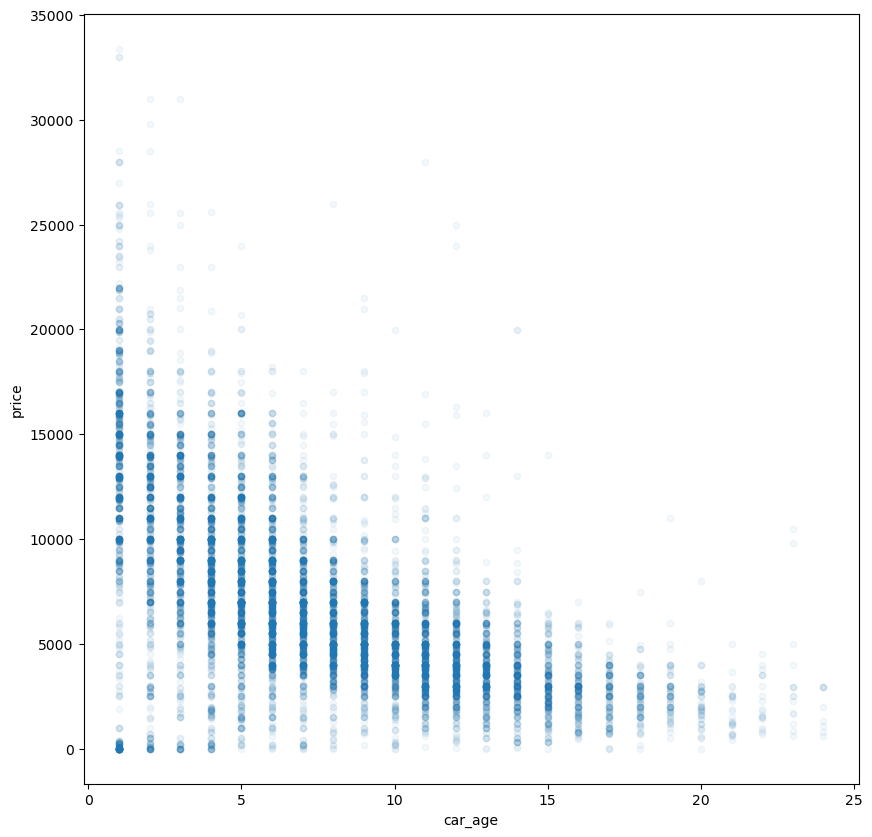

In [86]:
# price vs car_age graph
grafik (data=sedan, column_name='car_age')

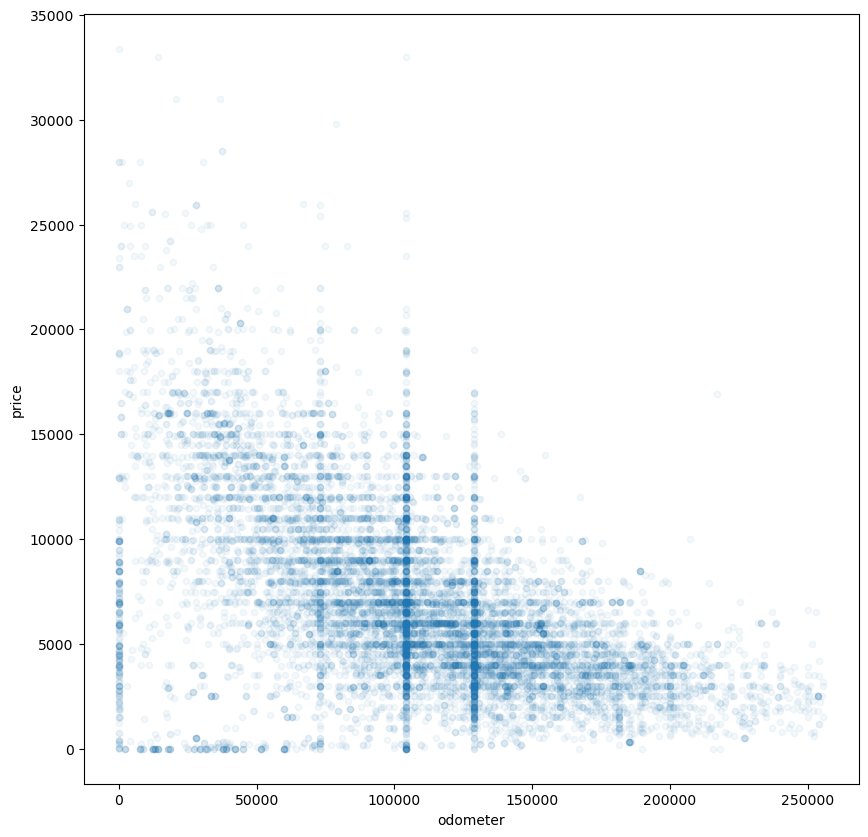

In [87]:
# price vs odometer graph
grafik (data=sedan, column_name='odometer')

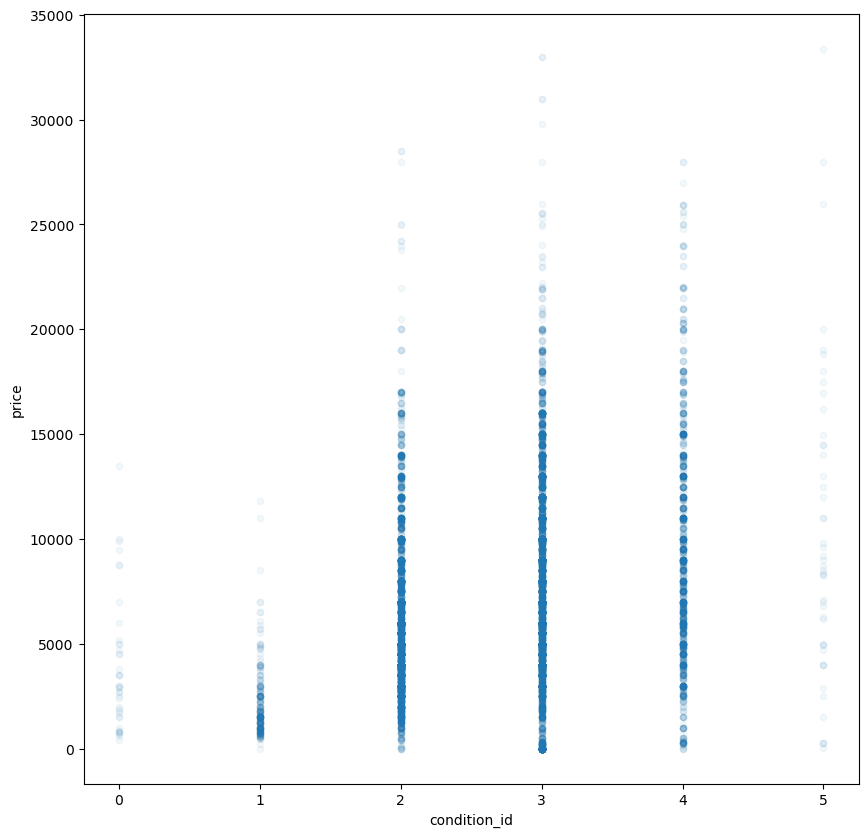

In [88]:
# price vs condition_id graph
grafik (data=sedan, column_name='condition_id')

In [89]:
# Checks the total value of the `transmission` column
sedan['transmission'].value_counts()

automatic    11301
manual         575
other          132
Name: transmission, dtype: int64

Because all types of transmission have more than 50 data, so it can be directly analyzed.

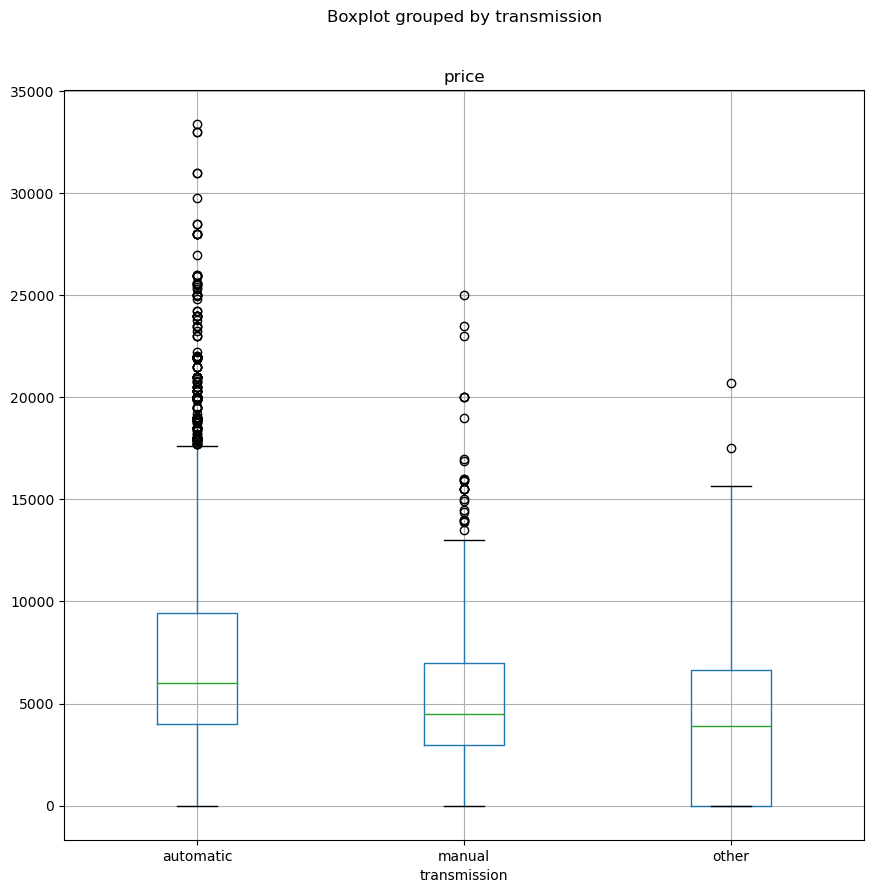

In [90]:
# price vs transmission graph
grafik (data=sedan, column_name='transmission')

In [91]:
# Checks the total value of the `paint_color` column
sedan['paint_color'].value_counts()

unknown    2161
silver     2032
black      1757
grey       1609
white      1490
blue       1220
red         934
custom      296
brown       254
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

Because the values ​​`yellow`, `purple`, and `orange` have data less than 50, we filter these columns first.

In [92]:
# Filter sedan table
sedan_filt = sedan.query('paint_color != ("yellow", "purple", "orange")')

# Distribution of data
sedan_filt['paint_color'].value_counts()

unknown    2161
silver     2032
black      1757
grey       1609
white      1490
blue       1220
red         934
custom      296
brown       254
green       202
Name: paint_color, dtype: int64

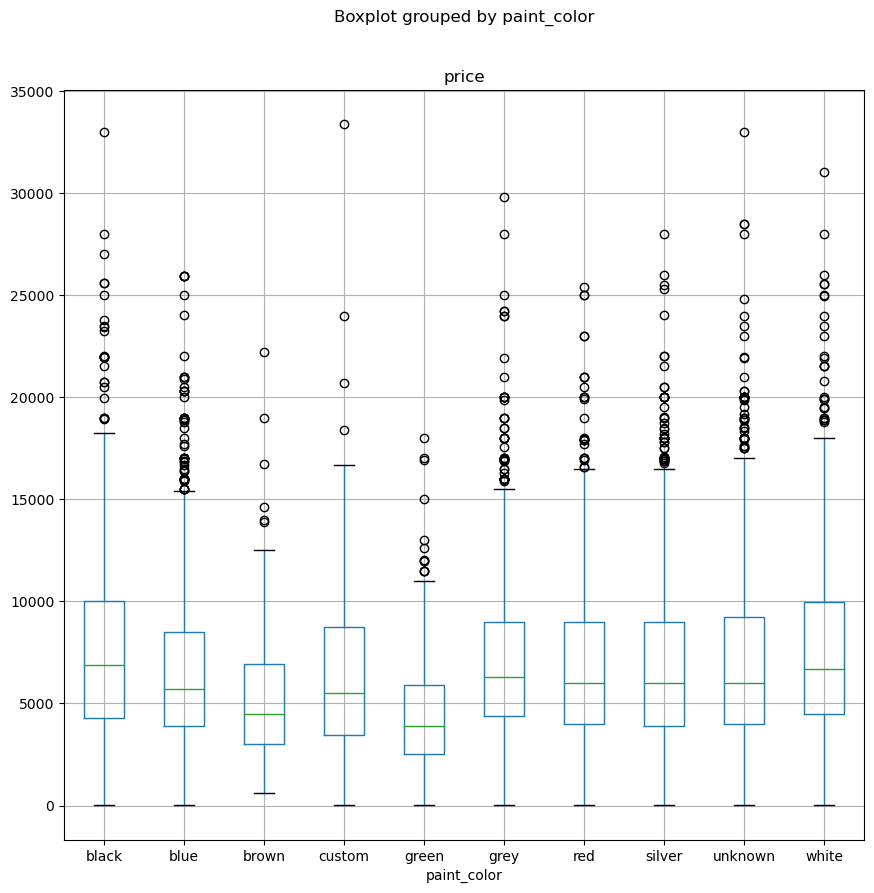

In [93]:
# price vs paint_color graph
grafik (data=sedan_filt, column_name='paint_color')

In [94]:
# Find out the Pearson coefficient on the dataset
sedan.corr()

,price,car_age,odometer,condition_id
price,1.000000,-0.603405,-0.519121,0.291963
car_age,-0.603405,1.000000,0.534472,-0.286314
odometer,-0.519121,0.534472,1.000000,-0.357054
condition_id,0.291963,-0.286314,-0.357054,1.000000


For this sedan type, it looks more or less the same as the SUV type, where the age and mileage of the vehicle are the most influential factors on the price of the vehicle. The black and white color with the automatic transmission type is the type of vehicle that has the highest price.

## General Conclusion <a id="Conclusion"></a>

After going through the *data quality checking* process (checking for missing values, column types, duplicates) and analyzing the filtered dataset, it was found that there were outliers in the `price`, `odometer`, and `car_age` columns possibly there is something wrong in recording the odometer of the vehicle.

So that the outliers do not affect the results of the analysis, the dataset is filtered from the *outliers* that are found and produces that:
1. Types of SUVs and sedans are the types of vehicles that have high prices.
2. Both the black SUV and sedan have the highest prices.
3. In contrast to the results of color characteristics, SUVs with manual transmissions and sedans with automatic transmissions are the most expensive.